## Observations and Insights 

In [180]:
# Observations: 
# 1. Capomulin and Ramicane both had a negative correlation of tumor volume over time but Infubinol and Ceftamin had a positive correlation leading
#     me to believe that the final two would not be effective treatments. 
# 2. There was no difference in tumor volume over time across the genders. See "Images" folder. 
# 3. Ketapril had the largest standard deviation of 8.279709 meaning the data has high variability. 

In [181]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
# mouse_metadata_path = "data/Mouse_metadata.csv"
# study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

# Combine the data into a single dataset
combined_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [182]:
# Checking the number of mice.
combined_results["Mouse ID"].nunique()


249

In [183]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#look up "duplicated" results to find out which mice had duplicate timepoints/IDs 
#in combined_results dataframes, should be less than 20 mice
# Selecting duplicate rows except first occurrence based on all columns
duplicates = combined_results[combined_results.duplicated()]
  
# Print the resultant Dataframe
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [184]:
# Optional: Get all the data for the duplicate mouse ID. use loc to find out how long each 
#mice lived or how many rows they appearead in
duplicate_rows = combined_results.loc[combined_results["Mouse ID"] == "g989"]
duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [185]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. Drop rows which have same Mice ID and time point and keep first entry then 
# print the latest dataframe

clean_results = combined_results.loc[combined_results["Mouse ID"] != "g989"]
clean_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [186]:
# Checking the number of mice in the clean DataFrame.
clean_results["Mouse ID"].nunique()

248

## Summary Statistics

In [187]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen. 
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = clean_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [188]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = clean_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(Mean='mean', Median='median', Variance='var', StandardDeviation='std', SEM='sem')
summary_stats.rename(columns={"StandardDeviation": "Standard Deviation"}, inplace=True)
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [202]:
timepoints = pd.DataFrame(combined_results.groupby(["Drug Regimen"]).count()["Timepoint"]).reset_index()
gender = combined_results["Sex"].value_counts()

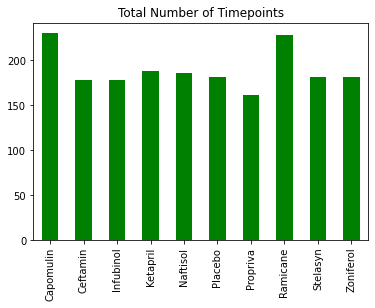

In [203]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
barplot = timepoints.plot(kind="bar", figsize=(6,4), color = "green", legend = False)

plt.title("Total Number of Timepoints")
plot_bar = barplot.set_xticklabels(timepoints["Drug Regimen"], rotation=90)


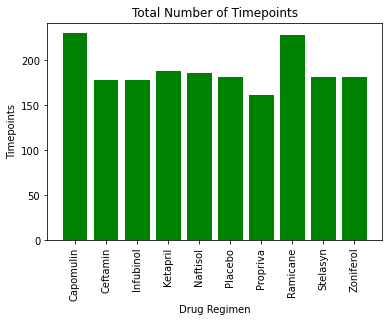

In [191]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = timepoints["Drug Regimen"]
y_axis = timepoints["Timepoint"]
plt.xticks(rotation="vertical")
plt.title("Total Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
bar_plt = plt.bar(x_axis, y_axis, color = "green")


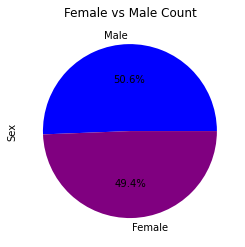

In [192]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie = gender.plot(kind="pie", y='gender', autopct='%1.1f%%', legend = False, title=("Female vs Male Count"), colors = ["blue", "purple"])

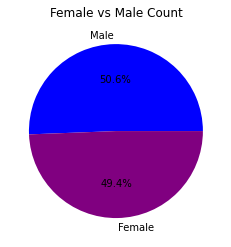

In [193]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Male = gender["Male"]
Female = gender["Female"]
colors = ["blue", "purple"]
sizes = gender
labels = ["Male", "Female"]
plt.title("Female vs Male Count")
pie_plot = plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors)

## Quartiles, Outliers and Boxplots

In [194]:
#in this box, I created separate dataframes for each drug and found the max tumor volume for each mouse using the
#tail suffix to get the last row. after meeting with my tutor, she explained that this wasn't necessary
#but it was still fun doing them
capo_data = clean_results.loc[clean_results["Drug Regimen"] == "Capomulin",:]
max_cap_tumor = capo_data.groupby("Mouse ID").tail(1)

cet_data = clean_results.loc[clean_results["Drug Regimen"] == "Ceftamin"]
max_cet_tumor = cet_data.groupby("Mouse ID").tail(1)

infu_data = clean_results.loc[clean_results["Drug Regimen"] == "Infubinol"]
max_infu_tumor = capo_data.groupby("Mouse ID").tail(1)

ram_data = clean_results.loc[clean_results["Drug Regimen"] == "Ramicane"]
max_ram_tumor = ram_data.groupby("Mouse ID").tail(1)

In [195]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin
#group by mouse ID and find max tumor volume at that point. first find the max timepoint

#this is creating a dataframe listing the last timepoint and max tumor volume for all mice across all drug regimen
max_tumor = clean_results.groupby("Mouse ID")

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = max_tumor.tail(1)
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint so some mice might have. 
merged_timepoints = pd.merge(max_timepoint, clean_results, on=["Mouse ID", "Timepoint"], how="left")

#this is where I tested if the coding I did above produced the correct results
#clean_results.loc[clean_results["Mouse ID"] == "b128"]
merged_timepoints

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,45,22.050126,1,Ramicane,Male,21,16,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1,Capomulin,Female,3,17,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0,Capomulin,Female,16,15,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1,Capomulin,Male,22,17,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0,Stelasyn,Female,21,28,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0,Propriva,Female,12,26,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3,Infubinol,Female,24,25,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3,Naftisol,Female,13,29,65.741070,3


In [196]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in regimens: 

    #values = merged_timepoints["Tumor Volume (mm3)_x"]
    values = merged_timepoints.loc[merged_timepoints["Drug Regimen_x"] == regimen, 'Tumor Volume (mm3)_x']
    tumor_vol_data.append(values)

    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {regimen} tumor volume is: {lowerq}")
    print(f"The upper quartile of {regimen} tumor volume is: {upperq}")
    print(f"The interquartile range of {regimen}'s tumor volumes is: {iqr}")
    print(f"The median of {regimen}'s tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} for {regimen} could be outliers.")
    print(f"Values above {upper_bound} for {regimen} could be outliers.")
    
    # Determine outliers using upper and lower bounds
    #outliers_count = merged_timepoints.loc[merged_timepoints["Tumor Volume (mm3)_x"] >= upper_bound] | (merged_timepoints['Tumor Volume (mm3)'] <= lower_bound)]).count()
    outliers_count = (values.loc[(merged_timepoints['Tumor Volume (mm3)_x'] >= upper_bound) | 
                                        (merged_timepoints['Tumor Volume (mm3)_x'] <= lower_bound)]).count()
    print(f'Number of {regimen} outliers: {outliers_count}.')
    print("-----------------------------------")

The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin's tumor volumes is: 7.781863460000004
The median of Capomulin's tumor volume is: 38.1251644 
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
Number of Capomulin outliers: 0.
-----------------------------------
The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane's tumor volumes is: 9.098536719999998
The median of Ramicane's tumor volume is: 36.56165229 
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.
Number of Ramicane outliers: 0.
-----------------------------------
The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.5257428

C:\Users\marqu\AppData\Local\Temp/ipykernel_14748/2854205058.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], rotation=90)


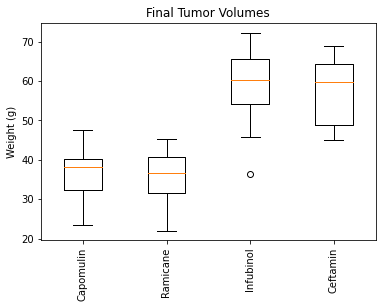

In [197]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Creating plot

fig, ax = plt.subplots()
ax.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], rotation=90)
ax.boxplot(tumor_vol_data)
ax.set_title('Final Tumor Volumes')
ax.set_ylabel('Weight (g)')

#show plot
plt.show()

## Line and Scatter Plots

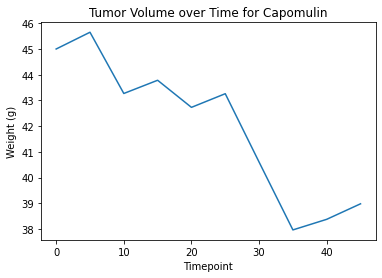

In [198]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#this is where I created a dataframe for just b128
b128_df = clean_results.loc[clean_results["Mouse ID"] == "b128"]
time = b128_df["Timepoint"]
tumor_volume = b128_df["Tumor Volume (mm3)"]
plt.plot(time, tumor_volume)
plt.title("Tumor Volume over Time for Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Weight (g)")
plt.show()

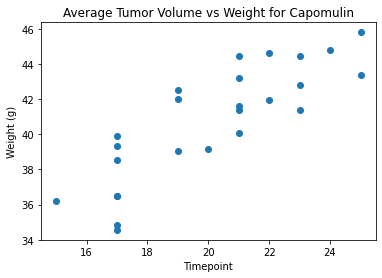

In [204]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor = capo_data.groupby("Mouse ID")
avg_tumor_vol = avg_tumor["Tumor Volume (mm3)"].mean()
weight = capo_data.groupby("Mouse ID")
mouse_weight = weight["Weight (g)"].max()
plt.scatter(mouse_weight, avg_tumor_vol)
plt.title("Average Tumor Volume vs Weight for Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Weight (g)")
plt.show()



## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84.


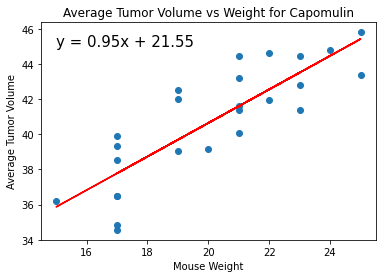

In [206]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(mouse_weight, avg_tumor_vol)[0],2)}.")
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor_vol)
plt.plot(mouse_weight, regress_values, "r-")
plt.annotate(line_eq,(15,45),fontsize=15,color="black")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title("Average Tumor Volume vs Weight for Capomulin")
plt.show()
